# Сокращение размерности

В каждом из заданий:
* Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков
* Попребирайте различное количество итоговых размерностей и постройте графики качества от количества размерностей. Выведите обе модели на одном графике в каждой заадче

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
np.random.seed(5)
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

# Forward selection (2pts)

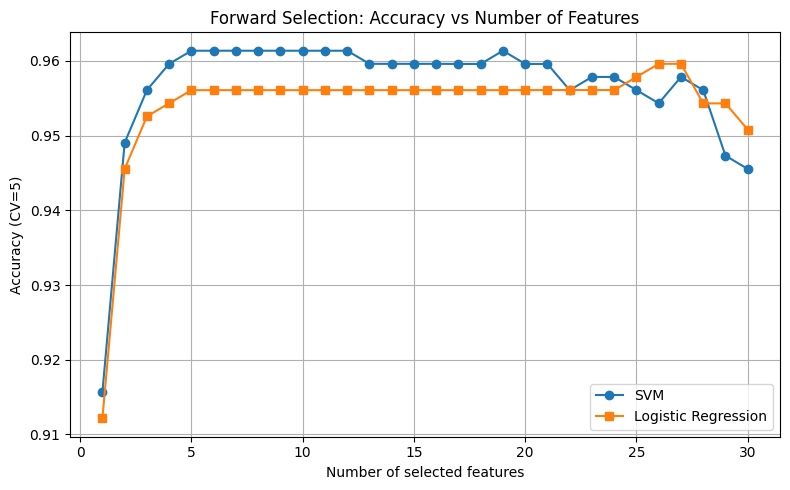

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

n_features = X_train.shape[1]

svm_clf = SVC(kernel="linear", C=1)
logreg_clf = LogisticRegression(max_iter=5000)

def forward_selection(model, X_train, y_train, X_val, y_val):
    selected = []
    scores = []

    for k in range(1, n_features + 1):
        best_score = -1
        best_feature = None

        for feature in range(n_features):
            if feature in selected:
                continue

            current_features = selected + [feature]
            model.fit(X_train[:, current_features], y_train)
            preds = model.predict(X_val[:, current_features])
            score = accuracy_score(y_val, preds)

            if score > best_score:
                best_score = score
                best_feature = feature

        selected.append(best_feature)
        scores.append(best_score)

    return scores

svm_scores = forward_selection(
    svm_clf, X_train, y_train, X_val, y_val
)

logreg_scores = forward_selection(
    logreg_clf, X_train, y_train, X_val, y_val
)

dims = np.arange(1, n_features + 1)

plt.figure(figsize=(8, 5))
plt.plot(dims, svm_scores, label="SVM", marker="o")
plt.plot(dims, logreg_scores, label="Logistic Regression", marker="s")
plt.xlabel("Number of selected features")
plt.ylabel("Accuracy")
plt.title("Forward Selection")
plt.legend()
plt.grid(True)
plt.show()


# Backward elimination (2pts)

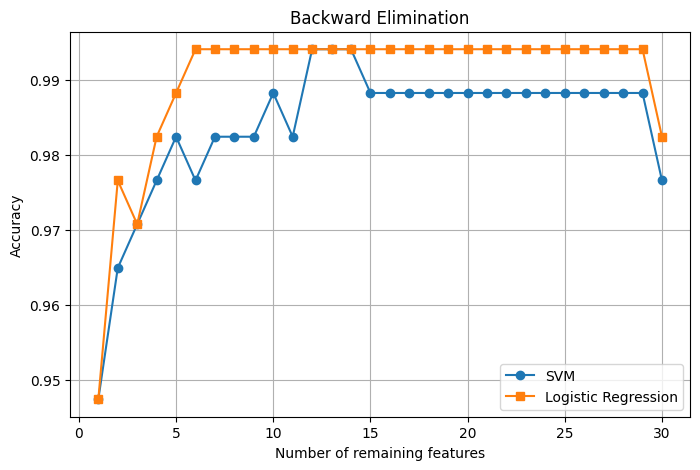

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

n_features = X_train.shape[1]

svm_clf = SVC(kernel="linear", C=1)
logreg_clf = LogisticRegression(max_iter=5000)

def backward_elimination(model, X_train, y_train, X_val, y_val):
    selected = list(range(n_features))
    scores = []

    while len(selected) > 0:
        model.fit(X_train[:, selected], y_train)
        preds = model.predict(X_val[:, selected])
        best_score = accuracy_score(y_val, preds)
        scores.append(best_score)

        worst_feature = None
        best_candidate_score = -1

        for feature in selected:
            candidate = [f for f in selected if f != feature]
            if len(candidate) == 0:
                continue

            model.fit(X_train[:, candidate], y_train)
            preds = model.predict(X_val[:, candidate])
            score = accuracy_score(y_val, preds)

            if score > best_candidate_score:
                best_candidate_score = score
                worst_feature = feature

        if worst_feature is None:
            break

        selected.remove(worst_feature)


    return scores

svm_scores = backward_elimination(
    svm_clf, X_train, y_train, X_val, y_val
)

logreg_scores = backward_elimination(
    logreg_clf, X_train, y_train, X_val, y_val
)

dims = np.arange(n_features, 0, -1)

plt.figure(figsize=(8, 5))
plt.plot(dims, svm_scores, label="SVM", marker="o")
plt.plot(dims, logreg_scores, label="Logistic Regression", marker="s")
plt.xlabel("Number of remaining features")
plt.ylabel("Accuracy")
plt.title("Backward Elimination")
plt.legend()
plt.grid(True)
plt.show()

# PCA (2 pts)


### EM алгоритм

Оставлю это тут просто чтобы пугать людей


$$
\log p(x|\theta) = \int q(z)\log p(x|\theta)dz = \int q(z)\log\dfrac{p(x,z|\theta)}{p(z|x,\theta)}dz = \int q(z)\log\dfrac{p(x,z|\theta)}{q(z)}dz+\int q(z)\log\dfrac{q(z)}{p(z|x,\theta)}dz = \mathcal{L}(q,\theta)+KL(q(z)|p(z|x,\theta))
$$

** E-step **
$$ q(z)^{(n+1)} = p(z|x,\theta^{(n)}) $$
** M-step **
$$ \theta^{(n+1)} = \max\limits_{\theta} \mathcal{L}(q^{(n+1)},\theta) $$

Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков. Попребирайте различное количество итоговых размерностей (до которых будет сокращать PCA) и постройте графики для обоих классификаторов. Сделайте выводы.

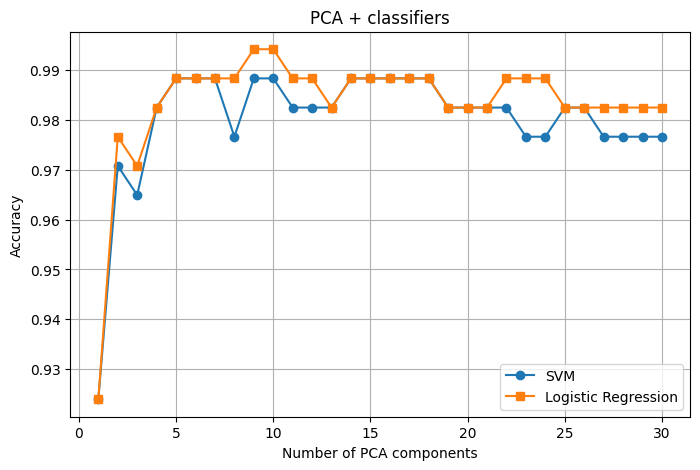

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, decomposition
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

np.random.seed(5)

dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_clf = SVC(kernel="linear", C=1)
logreg_clf = LogisticRegression(max_iter=5000)

svm_scores = []
logreg_scores = []
dims = range(1, X_train.shape[1] + 1)

for k in dims:
    pca = decomposition.PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    svm_clf.fit(X_train_pca, y_train)
    svm_pred = svm_clf.predict(X_test_pca)
    svm_scores.append(accuracy_score(y_test, svm_pred))

    logreg_clf.fit(X_train_pca, y_train)
    logreg_pred = logreg_clf.predict(X_test_pca)
    logreg_scores.append(accuracy_score(y_test, logreg_pred))

plt.figure(figsize=(8, 5))
plt.plot(dims, svm_scores, label="SVM", marker="o")
plt.plot(dims, logreg_scores, label="Logistic Regression", marker="s")
plt.xlabel("Number of PCA components")
plt.ylabel("Accuracy")
plt.title("PCA + classifiers")
plt.legend()
plt.grid(True)
plt.show()


#  Выводы (1pts)